In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import os
import numpy as np
import pandas as pd
import json

In [4]:
base_path = os.environ['AUVSI_CV_DATA']
LOG_PATH = os.path.join(base_path, '49.log')

In [5]:
lat, lon, relalt = [], [], []
rol, pitch, yaw = [], [], []
GPStime, ATTtime = [], []
sample_att = False

START = 2000
END = -1
with open(LOG_PATH, 'r') as f:
    for line in f:
        if not line.startswith('GPS') and not line.startswith('ATT'):
            continue
        
        parts = line.strip().split(',')
        if parts[0].startswith('GPS'):
            GPStime.append(float(parts[2]))
            lat.append(float(parts[6]))
            lon.append(float(parts[7]))
            relalt.append(float(parts[8]))
            sample_att = True
        elif sample_att and parts[0].startswith('ATT'):
            ATTtime.append(float(parts[1]))
            rol.append(float(parts[3]))
            pitch.append(float(parts[5]))
            yaw.append(float(parts[7]))
            sample_att = False
 
    GPStime = np.array(GPStime[START:END])
    lat = np.array(lat[START:END])
    lon = np.array(lon[START:END])
    relalt = np.array(relalt[START:END])
    ATTtime = np.array(ATTtime[START:END])
    rol = np.array(rol[START:END])
    pitch = np.array(pitch[START:END])
    yaw = np.array(yaw[START:END])

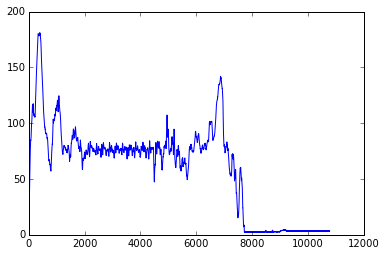

In [6]:
plot(relalt)

In [7]:
from AUVSIcv import NED

In [8]:
ned = NED.NED(lat[0], lon[0], 0)
x, y, z = zip(*[ned.geodetic2ned([la, lo, al]) for la, lo, al in zip(lat, lon, relalt)])

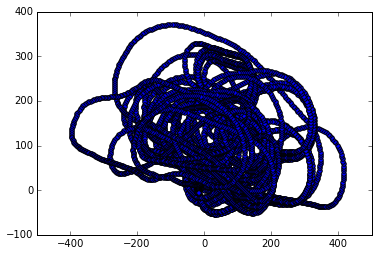

In [9]:
scatter(x, y)

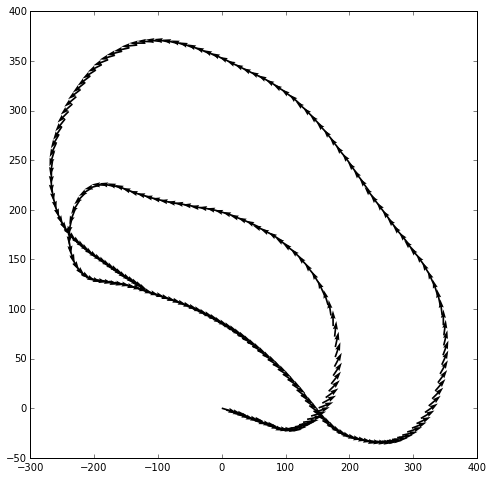

In [10]:
u, v = sin(deg2rad(90-yaw)), cos(deg2rad(90-yaw))
figure(figsize=(8, 8))
quiver(x[:500:2], y[:500:2], u[:500:2], v[:500:2])

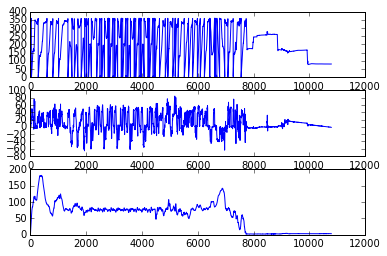

In [11]:
subplot(311)
plot(yaw)
subplot(312)
plot(rol)
subplot(313)
plot(relalt)

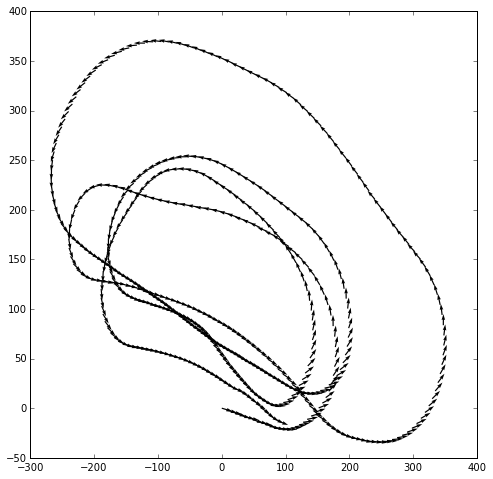

In [12]:
figure(figsize=(8, 8))
quiver(x[:1000:2], y[:1000:2], u[:1000:2], v[:1000:2])

In [13]:
data = pd.DataFrame(
    {
        'lat':lat,
        'lon':lon,
        'alt':relalt,
        'rol':rol,
        'pitch':pitch,
        'yaw':yaw
        }
    )

In [14]:
data.to_csv(os.path.join(base_path, '49.csv'))

# Real data

In [26]:
import json
import math
import AUVSIground.global_settings as gs
import glob

base_path = gs.IMAGES_FOLDER
#base_path = r'D:\amit\code\auvsi\image_processing\DATA\flight_data'
data_paths = glob.glob(os.path.join(base_path, '*.json'))
    
lat, lon, relalt = [], [], []
rol, pitch, yaw = [], [], []

for data_path in data_paths:
    with open(data_path, 'rb') as f:
        flight_data = json.load(f)
        lat.append(flight_data['lat']*1e-7)
        lon.append(flight_data['lon']*1e-7)
        relalt.append(flight_data['relative_alt']*1e-3)
        rol.append(math.degrees(flight_data['roll']))
        pitch.append(math.degrees(flight_data['pitch']))
        yaw.append(math.degrees(flight_data['yaw']))

lat = np.array(lat)
lon = np.array(lon)
relalt = np.array(relalt)
rol = np.array(rol)
pitch = np.array(pitch)
yaw = np.array(yaw)

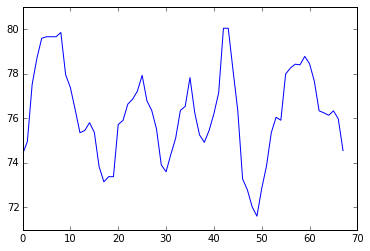

In [27]:
plot(relalt)

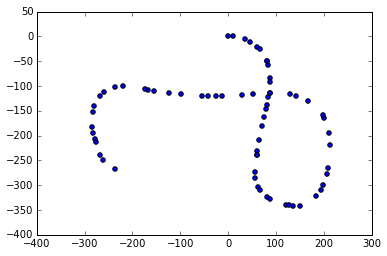

In [28]:
from AUVSIcv import NED
ned = NED.NED(lat[0], lon[0], 0)
x, y, z = zip(*[ned.geodetic2ned([la, lo, al]) for la, lo, al in zip(lat, lon, relalt)])
scatter(x, y)

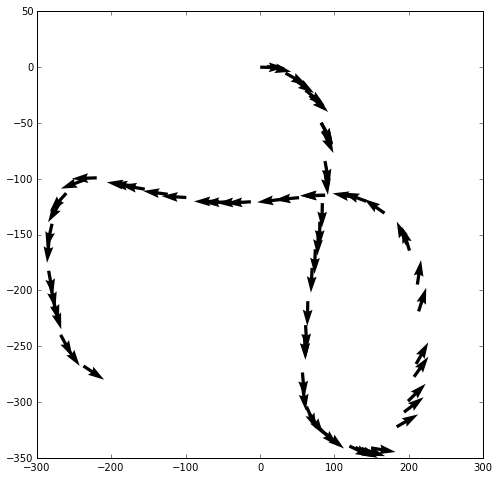

In [29]:
u, v = sin(deg2rad(90-yaw)), cos(deg2rad(90-yaw))
figure(figsize=(8, 8))
quiver(x, y, u, v)

#Filter Data 

In [25]:
import exifread

base_path = os.environ['AUVSI_CV_DATA']
img_paths = sorted(glob.glob(os.path.join(base_path, '*.jpg')))

for img_path in img_paths:
    with open(img_path, 'rb') as f:
        tags = exifread.process_file(f)

    print tags['Image DateTime'].values.replace(':', '_').replace(' ', '_')

2015_03_29_13_23_05
2015_03_29_13_23_06
2015_03_29_13_23_07
2015_03_29_13_23_07
2015_03_29_13_23_08
2015_03_29_13_23_09
2015_03_29_13_23_10
2015_03_29_13_23_11
2015_03_29_13_23_11
2015_03_29_13_23_12
2015_03_29_13_23_13
2015_03_29_13_23_14
2015_03_29_13_23_15
2015_03_29_13_23_15
2015_03_29_13_23_16
2015_03_29_13_23_17
2015_03_29_13_23_18
2015_03_29_13_23_19
2015_03_29_13_23_19
2015_03_29_13_23_20
2015_03_29_13_23_21
2015_03_29_13_23_22
2015_03_29_13_23_23
2015_03_29_13_23_23
2015_03_29_13_23_24
2015_03_29_13_23_25
2015_03_29_13_23_26
2015_03_29_13_23_27
2015_03_29_13_23_27
2015_03_29_13_23_28
2015_03_29_13_23_29
2015_03_29_13_23_30
2015_03_29_13_23_30
2015_03_29_13_23_31
2015_03_29_13_23_32
2015_03_29_13_23_33
2015_03_29_13_23_34
2015_03_29_13_23_35
2015_03_29_13_23_35
2015_03_29_13_23_36
2015_03_29_13_23_37
2015_03_29_13_23_38
2015_03_29_13_23_39
2015_03_29_13_23_39
2015_03_29_13_23_40
2015_03_29_13_23_41
2015_03_29_13_23_42
2015_03_29_13_23_43
2015_03_29_13_23_43
2015_03_29_13_23_44
